# Assignment 5

The given dataset contains price of second-hand Hyundai grand i10 car with 
respect to year of making. Find the best linear relationship between year and 
price. Can you predict the possible price of a 2022 model second-hand grand i10?
Please learn about lasso regression and create a model along with linear
regression. Find out which one is performing better.

In [19]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# importing dataset
data=pd.read_csv(r'C:\Users\induj\Downloads\car_age_price.csv')

In [21]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [22]:
# shape of the data
data.shape

(112, 2)

In [23]:
# check for null values
data.isna().sum()

Year     0
Price    0
dtype: int64

In [24]:
data['Price'].nunique()

35

In [25]:
data['Price'].unique()

array([465000, 755000, 700000, 350000, 425000, 575000, 509999, 500000,
       600000, 475000, 550000, 434999, 650000, 450000, 486000, 545000,
       525000, 396000, 325000, 345000, 341000, 490000, 540000, 595000,
       495000, 400000, 300000, 320000, 409999, 390000, 480000, 520000,
       640000, 375000, 420000], dtype=int64)

In [26]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


<AxesSubplot:>

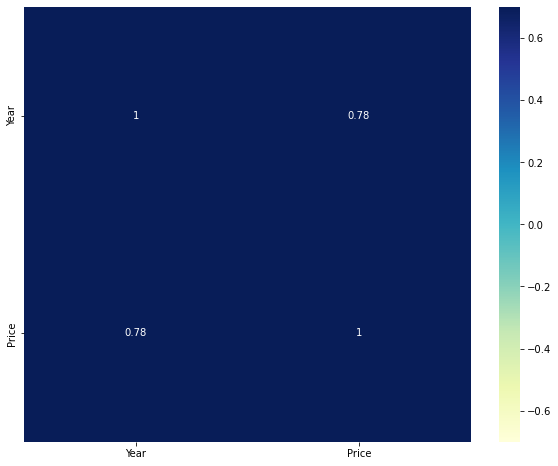

In [27]:
# correlation matrix
corrmatrix=data.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corrmatrix,vmin=-0.7,vmax=0.7,annot=True,cmap='YlGnBu')

In [28]:
# fetching the values from the given column

In [29]:
# reshaping it to our expected format to feed into the model
print("Expected format is: \n", data['Year'].values.reshape(-1,1))

x = data['Year'].values.reshape(-1,1)
y = data['Price'].values.reshape(-1,1)

Expected format is: 
 [[2018]
 [2019]
 [2019]
 [2018]
 [2018]
 [2015]
 [2016]
 [2017]
 [2017]
 [2017]
 [2019]
 [2018]
 [2017]
 [2019]
 [2017]
 [2017]
 [2017]
 [2017]
 [2019]
 [2017]
 [2018]
 [2019]
 [2015]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2019]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2018]
 [2020]
 [2019]
 [2019]
 [2018]
 [2019]
 [2019]
 [2018]
 [2019]
 [2018]
 [2016]
 [2018]
 [2013]
 [2018]
 [2013]
 [2013]
 [2017]
 [2017]
 [2014]
 [2017]
 [2014]
 [2016]
 [2015]
 [2017]
 [2017]
 [2017]
 [2015]
 [2017]
 [2017]
 [2015]
 [2015]
 [2015]
 [2015]
 [2017]
 [2015]
 [2013]
 [2017]
 [2017]
 [2015]
 [2015]
 [2015]
 [2015]
 [2015]
 [2014]
 [2015]
 [2017]
 [2015]
 [2015]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2020]
 [2020]
 [2020]
 [2016]
 [2015]
 [2015]
 [2017]
 [2014]
 [2014]
 [2015]
 [2016]
 [2014]
 [2015]
 [2016]
 [2015]]


In [30]:
# split the dataset to train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42) 
print("X_train is \n", X_train) 
print("y_train is \n", y_train)

X_train is 
 [[2017]
 [2017]
 [2017]
 [2015]
 [2015]
 [2014]
 [2015]
 [2017]
 [2019]
 [2018]
 [2017]
 [2017]
 [2014]
 [2015]
 [2017]
 [2015]
 [2015]
 [2016]
 [2015]
 [2020]
 [2017]
 [2017]
 [2014]
 [2017]
 [2016]
 [2017]
 [2019]
 [2015]
 [2020]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2018]
 [2019]
 [2015]
 [2017]
 [2018]
 [2017]
 [2018]
 [2015]
 [2016]
 [2015]
 [2017]
 [2017]
 [2017]
 [2013]
 [2015]
 [2019]
 [2015]
 [2017]
 [2014]
 [2015]
 [2019]
 [2014]
 [2016]
 [2017]
 [2017]
 [2017]
 [2017]
 [2014]
 [2016]
 [2017]
 [2017]
 [2017]
 [2017]
 [2020]
 [2019]
 [2013]
 [2019]
 [2019]
 [2017]
 [2017]
 [2016]
 [2017]
 [2017]
 [2015]
 [2015]
 [2018]
 [2015]
 [2017]
 [2015]
 [2017]
 [2017]
 [2018]
 [2015]]
y_train is 
 [[525000]
 [520000]
 [540000]
 [434999]
 [320000]
 [390000]
 [325000]
 [500000]
 [650000]
 [450000]
 [575000]
 [550000]
 [341000]
 [490000]
 [550000]
 [400000]
 [350000]
 [375000]
 [450000]
 [545000]
 [550000]
 [500000]
 [400000]
 [450000]
 [420000]
 [575000]
 

In [31]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
#let's fit the data
regressor.fit(X_train,y_train)

LinearRegression()

In [32]:
#let's make a prediction
pred=regressor.predict([[2020]])
print("for the given Year the Price will be:",pred)

for the given Year the Price will be: [[648384.48032889]]


In [33]:
y_pred=regressor.predict(X_test)
print("y_pred for the given test data is",y_pred)

y_pred for the given test data is [[600775.91252081]
 [505558.77690466]
 [553167.34471273]
 [553167.34471273]
 [553167.34471273]
 [410341.6412885 ]
 [505558.77690466]
 [553167.34471273]
 [600775.91252081]
 [600775.91252081]
 [315124.50567235]
 [505558.77690466]
 [410341.6412885 ]
 [648384.48032889]
 [553167.34471273]
 [600775.91252081]
 [315124.50567235]
 [410341.6412885 ]
 [505558.77690466]
 [505558.77690466]
 [505558.77690466]
 [505558.77690466]
 [505558.77690466]]
